# Data Overview

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Define file paths
file_paths = {
    "Bacteria": "../../data/raw/metadata/bacteria_ids.tsv",
    "Archaea": "../../data/raw/metadata/archaea_ids.tsv",
    "Fungi": "../../data/raw/metadata/fungi_ids.tsv",
    "Eukaryote": "../../data/raw/metadata/eukaryote_ids.tsv",
    "Viruses": "../../data/raw/metadata/viruses_ids.tsv",
    "Plasmids": "../../data/raw/metadata/plasmids_ids.tsv",
}

In [17]:
# Load data into DataFrames
dataframes = {}
for group, path in file_paths.items():
    df = pd.read_csv(path, sep="\t", header=None, names=["Accession", "Release Date"])
    df["Taxonomic Group"] = group
    dataframes[group] = df

In [18]:
# Combine all data
combined_df = pd.concat(dataframes.values(), ignore_index=True)

# Convert 'Release Date' to datetime
combined_df["Release Date"] = pd.to_datetime(combined_df["Release Date"])

In [19]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304747 entries, 0 to 304746
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Accession        304747 non-null  object        
 1   Release Date     258697 non-null  datetime64[ns]
 2   Taxonomic Group  304747 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 7.0+ MB


In [20]:
genomes_per_group = combined_df["Taxonomic Group"].value_counts()

In [21]:
genomes_per_group

Taxonomic Group
Viruses      193419
Bacteria     108693
Archaea        1353
Eukaryote       759
Fungi           518
Plasmids          5
Name: count, dtype: int64

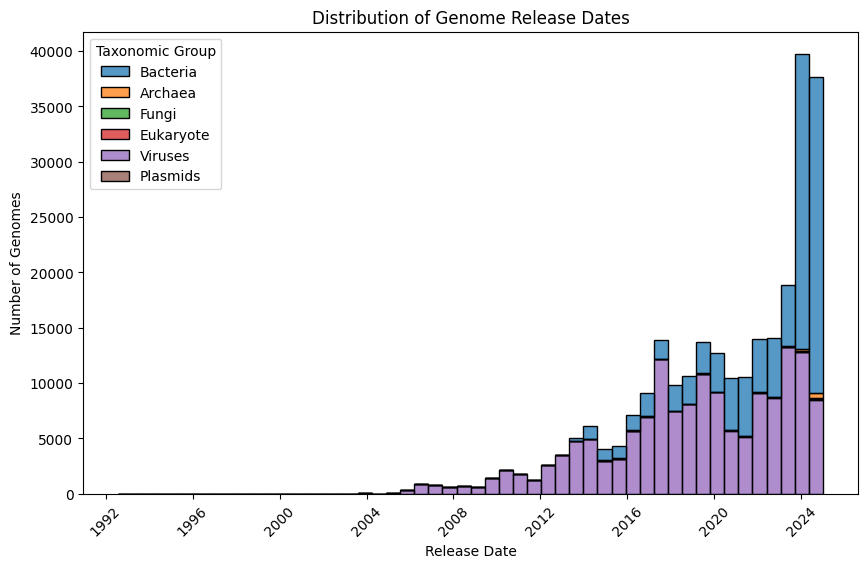

In [22]:
# Distribution of release dates
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_df, x="Release Date", hue="Taxonomic Group", multiple="stack", bins=50)
plt.title("Distribution of Genome Release Dates")
plt.xlabel("Release Date")
plt.ylabel("Number of Genomes")
plt.xticks(rotation=45)
plt.show()